In [2]:
from Tools import *
from photoObject import *
import emcee
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import xmatch
from Tools import *

In [3]:
def angstromTokms(centralA,As):
    c=299792
    v=c*(As-centralA)/centralA
    return v

def LineToRedshift(Obs,Rest):
    return (Obs/Rest)-1

def RedshiftToLine(Obs,z):
    return (Obs/(1+z))

In [7]:
CatBino=ReadCatalogs("../A-Catalogs/Binospec-Candels.cat")
CatBino=CatBino[CatBino["Type"]=="LAE"]
Fresco=ReadCatalogs("../A-Catalogs/Fresco.cat")

idx,d2d=xmatch.xmatch(CatBino["ra_candels"],CatBino["dec_candels"],Fresco["ra"],Fresco["dec"])
mask=[]
for i,d in zip(idx,d2d):
    print(i,d)
    if d.value<(0.5/3600.):
        mask.append(True)
    else:
        mask.append(False)


CatBino=CatBino[mask]
idx=idx[mask]
d2d=d2d[mask]
Fresco=[Fresco[i] for i in idx]


ids=[]
Fresco2,Bino2 = [],[]

# iterate through each element in the original array
for i,element in enumerate(Fresco):
    # add the element to the new list if it is not already there
    if element["id"] not in ids:
        Fresco2.append(element)
        Bino2.append(CatBino[i])
    else:
        print(CatBino[i]["id_charlotte"])
    ids.append(element["id"])

Fresco=Fresco2
CatBino=Bino2


9576 0d00m24.07933175s
10689 0d03m55.98281131s
3861 0d02m09.08242006s
146 0d00m00.08421078s
506 0d00m00.0715345s
1759 0d02m50.39286278s
1981 0d01m46.33277273s
153 0d00m49.88724666s
867 0d00m00.05358262s
4087 0d00m00.0924666s
326 0d00m00.06845747s
315 0d00m00.02405121s
137 0d00m00.05786819s
4066 0d00m00.23463215s
10833 0d00m00.14642126s
10617 0d01m26.04749617s
918 0d00m00.07665319s
1216 0d00m00.03832172s
3719 0d00m00.09653625s
7217 0d01m48.32146383s
7578 0d01m53.09153057s
5157 0d03m50.80136215s
9576 0d02m33.11708445s
10689 0d03m00.06949832s
10689 0d03m55.98281131s
9783 0d01m31.69449109s
320 0d01m16.40107324s
3861 0d02m44.88617218s
3861 0d02m38.18255323s
4380 0d02m39.27337798s
6023 0d01m05.47659384s
6091 0d01m19.15824s
6091 0d00m35.26177394s
483 0d03m16.14341076s
927 0d02m46.3166024s
251 0d01m03.63954666s
6345 0d00m49.2488977s
791 0d00m00.11498051s
1299 0d01m23.84497001s
63 0d00m00.15168596s
1198 0d00m00.04539901s
736 0d00m00.02296154s
784 0d00m00.00317336s
10617 0d01m51.10869104s
4485 0

In [8]:
i=0
for f,b in zip(Fresco,CatBino):
    print(i,f["id"],b["id_charlotte"],b["ra_candels"],b["dec_candels"])
    i=i+1

0 1068 z5_GNW_12024 189.14324485 62.17987183
1 3104 z6_GNW_14511 189.1005376 62.19534394
2 17056 z6_GND_19165 189.34773322 62.24986594
3 21172 z6_GND_14309 189.33404671 62.26305778
4 3831 z6_GND_36100 189.19127434 62.19951881
5 28976 z6_GND_43125 189.18913737 62.30065863
6 789 z6_GNW_11543 189.15744108 62.17650152
7 3529 z6_GND_36553 189.15639949 62.19771589
8 27825 z5_GND_7766 189.13929976 62.29186978
9 26021 z6_GND_44831 189.17513458 62.28226654
10 28342 z7_GND_43678 189.23520109999998 62.29559743
11 26881 z7_GND_8358 189.15531040000002 62.28646082
12 12607 z5_GND_23860 189.31438453 62.23646055
13 1904 z5_GND_39445 189.17864269 62.18723406
14 24946 z5_GND_10047 189.29627745 62.27738622
15 9397 z5_GND_27819 189.11033662 62.22544088
16 15130 z5_GND_21153 189.0496284 62.24403342
17 18352 z5_GND_17752 189.09179789 62.25373546
18 4350 z8_GND_35384 189.23198934 62.20233294
19 16299 Stark11_43_3982 189.0399444 62.24772144
20 30776 Jung18_z6_GND_5752 189.19908156 62.32098098
21 11282 Stark11

In [10]:
LyaFlux=[gal["LyaFlux"] for gal in CatBino]
ids=[gal["id_charlotte"] for gal in CatBino]
ra=[gal["ra_candels"] for gal in CatBino]
dec=[gal["dec_candels"] for gal in CatBino]

LyaFlux=10**np.array(LyaFlux)
lines=ascii.read("../A-Catalogs/HaLines.cat")
DetectionLimit=2e-18
HaFlux=[]

for f in LyaFlux:
    HaFlux.append(f/1./8.7)



In [11]:
count=0
for i,f,r,d in zip(ids,HaFlux,ra,dec):
    if lines[count]["Ha"]=="X" and lines[count]["Oiii"]=="X":
        if f<DetectionLimit:
            print(i,f,r,d,"  Undetectable")
        if f>=DetectionLimit:
            print(i,f,r,d,"  detectable")
    count=count+1

z5_GNW_12024 8.232015665247337e-19 189.14324485 62.17987183   Undetectable
z6_GND_19165 8.257100847743227e-19 189.34773322 62.24986594   Undetectable
z6_GND_14309 2.223160643307625e-18 189.33404671 62.26305778   detectable
z6_GNW_11543 4.374323633522749e-19 189.15744108 62.17650152   Undetectable
z6_GND_36553 7.984526920388121e-19 189.15639949 62.19771589   Undetectable
z5_GND_7766 1.3537089608019429e-18 189.13929976 62.29186978   Undetectable
z6_GND_44831 2.2639611651331025e-18 189.17513458 62.28226654   detectable
z7_GND_43678 1.7744623822054395e-18 189.23520109999998 62.29559743   Undetectable
z5_GND_23860 1.4484246183314023e-18 189.31438453 62.23646055   Undetectable
z5_GND_10047 2.63773248486824e-19 189.29627745 62.27738622   Undetectable
z8_GND_35384 2.9363976932330592e-18 189.23198934 62.20233294   detectable
Stark11_43_3982 7.277967779022945e-19 189.0399444 62.24772144   Undetectable
Jung18_z6_GND_5752 1.0292608385956924e-18 189.19908156 62.32098098   Undetectable
Stark11_32_16

In [12]:
import os
FrescMeta={}
for i in range(0,len(CatBino)):
    print(i,Fresco[i]["id"],CatBino[i]["id_charlotte"],CatBino[i]['z'],6564.614*(1+CatBino[i]['z']),Fresco[i]["ra"],CatBino[i]["ra_candels"])
    if len(str(Fresco[i]["id"]))==5:
        FrescMeta[str(CatBino[i]["id_charlotte"])]=[str(Fresco[i]["id"]),CatBino[i]['z']]
        #os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_'+str(Fresco[i]["id"])+'.1D.fits')
    if len(str(Fresco[i]["id"]))==4:
        FrescMeta[str(CatBino[i]["id_charlotte"])]=["0"+str(Fresco[i]["id"]),CatBino[i]['z']]
        #os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_0'+str(Fresco[i]["id"])+'.1D.fits')
    if len(str(Fresco[i]["id"]))==3:
        FrescMeta[str(CatBino[i]["id_charlotte"])]=["00"+str(Fresco[i]["id"]),CatBino[i]['z']]
        #os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_00'+str(Fresco[i]["id"])+'.1D.fits')



0 1068 z5_GNW_12024 5.1681896597641295 40491.78419514284 189.14321331 189.14324485
1 3104 z6_GNW_14511 5.616497946275061 43434.75504908851 189.10049518 189.1005376
2 17056 z6_GND_19165 6.049667650225273 46278.34695201593 189.34774799 189.34773322
3 21172 z6_GND_14309 5.9677187764744275 45740.384228106894 189.3340935 189.33404671
4 3831 z6_GND_36100 5.60365711776697 43350.459966492694 189.19125007 189.19127434
5 28976 z6_GND_43125 5.65919641303879 43715.05400178422 189.18912367 189.18913737
6 789 z6_GNW_11543 5.769960179845872 44442.17537605872 189.15741901 189.15744108
7 3529 z6_GND_36553 5.612158889401561 43406.27081558994 189.15632616 189.15639949
8 27825 z5_GND_7766 5.591906181481391 43273.31960563928 189.13921616 189.13929976
9 26021 z6_GND_44831 6.73664539319387 50788.09066119598 189.17510418 189.17513458
10 28342 z7_GND_43678 6.121740345183027 46751.476374353326 189.23517989 189.23520109999998
11 26881 z7_GND_8358 6.8177482738244315 51320.49976682369 189.15526544 189.155310400000

In [13]:
redsh=LineToRedshift(47220,6564.614)
print(redsh)
print(RedshiftToLine(8155,redsh))
print(RedshiftToLine(48590,redsh))
print("Lya Counterpart: ",1215.670*(1+redsh))
print("Separation: ",5893.799472295514-5275.857519788919)
print(6564.6+618)

6.193111430466438
1133.723574121135
6755.073999576451
Lya Counterpart:  8744.449772675134
Separation:  617.941952506595
7182.6


In [14]:
ids=[]
for i,j in zip(Fresco,CatBino):
    if len(str(i["id"])) == 3:
        num = "00" + str(i["id"])
    elif len(str(i["id"])) == 4:
        num = "0" + str(i["id"])
    else:
        num=str(i["id"])
    ids.append(num)

In [15]:
LyaFlux[20]

8.954569295782523e-18

In [16]:

import ipympl
%load_ext autoreload
%autoreload 
%matplotlib widget

"""
i=20
f=fits.open("../data/large_files/Fresco/fresco-gdn-med_"+ids[i]+".1D.fits")


plt.rcParams["figure.figsize"] = (10,5)
Ha=6564.614*(1+CatBino[i]['z'])
Oiii=5008.239*(1+CatBino[i]['z'])

Wave=angstromTokms(Ha,f[1].data["wave"])
oriWave=f[1].data["wave"]
plt.plot(Wave,f[1].data["flux"])
plt.plot(Wave,f[1].data["err"],color="red",ls="--")


#plt.axvline(x=Ha,color="black",label="Expected Ha from Binospec",alpha=0.5)
#plt.axvline(x=Oiii,color="black",label="Expected oiii from Binospec",alpha=0.5)
#plt.xlim(Ha-1000,Ha+1000)
#plt.xlim(-20000,1000)
#plt.xlim(-15000,3000)
plt.legend()
plt.title(str(CatBino[i]['id_charlotte'])+"   Lya Flux: "+str(LyaFlux[i]))
plt.xlabel("Angstrom[A]")
#plt.xlabel("kms-1")
plt.show()
plt.clf()
"""

'\ni=20\nf=fits.open("../data/large_files/Fresco/fresco-gdn-med_"+ids[i]+".1D.fits")\n\n\nplt.rcParams["figure.figsize"] = (10,5)\nHa=6564.614*(1+CatBino[i][\'z\'])\nOiii=5008.239*(1+CatBino[i][\'z\'])\n\nWave=angstromTokms(Ha,f[1].data["wave"])\noriWave=f[1].data["wave"]\nplt.plot(Wave,f[1].data["flux"])\nplt.plot(Wave,f[1].data["err"],color="red",ls="--")\n\n\n#plt.axvline(x=Ha,color="black",label="Expected Ha from Binospec",alpha=0.5)\n#plt.axvline(x=Oiii,color="black",label="Expected oiii from Binospec",alpha=0.5)\n#plt.xlim(Ha-1000,Ha+1000)\n#plt.xlim(-20000,1000)\n#plt.xlim(-15000,3000)\nplt.legend()\nplt.title(str(CatBino[i][\'id_charlotte\'])+"   Lya Flux: "+str(LyaFlux[i]))\nplt.xlabel("Angstrom[A]")\n#plt.xlabel("kms-1")\nplt.show()\nplt.clf()\n'

In [49]:
%load_ext autoreload
%autoreload
from photoObject import *
PObj=[]
Reals=ascii.read("../A-Catalogs/HaLines.cat")
CatBinoFilt = [gal["id_charlotte"] for gal in CatBino if gal["voff"] > 0]
extra = [["0",gal["z"],gal["ra_candels"],gal["dec_candels"]] for gal in CatBino if gal["voff"] > 0]

Reals = [real for real in Reals if real["ID"] in CatBinoFilt]
#Reals=Reals[Reals["Notes"]=="Real"]
for gal in Reals:
    PObj.append(PhotoObject(gal,FrescMeta[gal["ID"]]))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
FrescMeta[gal["ID"]]

['08915', 6.553687390077254]

In [51]:
CatBinoFilt["id_charlotte"]

TypeError: list indices must be integers or slices, not str

In [52]:
def FitGaussian(wave,Flux,FluxErr,lineWave,ShowPlots=True):
    inValues=[1,lineWave,5,0]
    labels = ["Amp","Mean", "FWHM","C"]

    stp=1500
    discard=1000
    walknum=50
    sampler,logprob=MCMC.runMCMC([wave,Flux,FluxErr],inValues,lineWave,steps=stp,nwalkers=walknum)
    if ShowPlots==True:
        MCMC.plotChain(sampler,labels)
        MCMC.plotCorner(sampler,labels,discard=discard)
        MCMC.plotModels(sampler,wave,Flux,FluxErr,discard=discard)

    pairs,ampVals,meanVals,stdVals,cVals=MCMC.returnParameters(sampler,discard=discard)
    return meanVals,stdVals#betaVals[1],MuvVals[1],[betaErr,MuvErr],[Flux,FluxErr],pairs


In [55]:
%load_ext autoreload
%autoreload
ln=["Ha","Oiii"]
for gal in PObj:
    print(gal.ID)
    f=fits.open("../A-Catalogs/data/large_files/Fresco/fresco-gdn-med_"+gal.IDFresco+".1D.fits")
    wave,flux,err=f[1].data["wave"],f[1].data["flux"],f[1].data["err"]

    tempM={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}
    tempS={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}

    for l in ln:
        if getattr(gal, "aWave"+l)=="X":
            continue
        
        approxWave=float(getattr(gal, "aWave"+l))
        mask=(wave>approxWave-200)&(wave<approxWave+200)
        wave,flux,err=wave[mask],flux[mask],err[mask]
        #flux[flux<0]=0.0
        #plt.plot(wave,flux)
        #plt.show()
        m,s=FitGaussian(wave,flux,err,approxWave,ShowPlots=False)
        tempM[l]=m
        tempS[l]=s
    gal.giveWave(tempM)
    gal.giveFWHM(tempS)
    


  0%|          | 0/1500 [00:00<?, ?it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
z6_GNW_14511


  3%|▎         | 40/1500 [00:00<00:03, 395.40it/s]

z6_GND_36100


  3%|▎         | 44/1500 [00:00<00:03, 438.71it/s]

z6_GND_43125


  3%|▎         | 48/1500 [00:00<00:03, 479.29it/s]

z7_GND_8358


  3%|▎         | 49/1500 [00:00<00:03, 482.08it/s]

z5_GND_39445


  3%|▎         | 43/1500 [00:00<00:03, 425.34it/s]

z5_GND_27819


  4%|▎         | 53/1500 [00:00<00:02, 523.82it/s]

z5_GND_21153


  2%|▏         | 30/1500 [00:00<00:05, 293.77it/s]

z5_GND_17752


  1%|          | 8/1500 [00:00<00:22, 66.29it/s]

Stark11_33_17705


  3%|▎         | 49/1500 [00:00<00:02, 485.78it/s]

Stark11_34_24923


  3%|▎         | 48/1500 [00:00<00:03, 476.24it/s]

Jung18_z6_GND_28438


100%|██████████| 1500/1500 [00:02<00:00, 590.06it/s]


In [15]:
%load_ext autoreload
%autoreload
for gal in PObj:
    gal.getOffset()
    gal.getFWHM()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
len(PObj)

8

In [17]:
#Alldata=[slopes,Muv,FWHM,LyaLum,Skewness,EW,maskLAE,cat,dEW,dSlp,dMuv
AllData=np.load("../Catalogs/AllData.npy",allow_pickle=True).transpose()
for gal in PObj:
    for data in AllData:
        if gal.ID==data[7][1]:
            setattr(gal,"Muv",[data[1],data[10]])
            setattr(gal,"EW",[data[5],data[8]])


In [18]:
Muvs=np.array([gal.Muv for gal in PObj])
Ews=[gal.EW[0] for gal in PObj]
Offset=np.array([gal.off for gal in PObj])
FWHM=[gal.fwhm[1] for gal in PObj]
zs=[gal.zLya for gal in PObj]


def GetPlottable(vals):
    val=vals[:,1]
    val_minus=np.abs(vals[:,1]-vals[:,0])
    val_plus=np.abs(vals[:,2]-vals[:,1])
    return np.array([val,val_minus,val_plus])

Offset=GetPlottable(Offset)

def AddIntrinsic(Offset):
    O1=np.sqrt(Offset[1]**2+60**2)
    O2=np.sqrt(Offset[2]**2+60**2)
    return[Offset[0],O1,O2]

#Offset=AddIntrinsic(Offset)

np.save("../Catalogs/Muvs.npy",Muvs.transpose())
np.save("../Catalogs/Offset.npy",Offset)
np.save("../Catalogs/zs.npy",zs)

In [19]:
#plt.scatter(Muvs[:,0],Offset[0])
#plt.show()

#plt.scatter(Ews,Offset[0])
#plt.show()

#plt.scatter(FWHM,Offset)
#plt.show()

In [20]:
%matplotlib inline

def MaskSpec(dat,zlya,range=30,unmasked=False):
    lya=1215.335*(1+zlya)
    mask=(dat[0]>lya-range) & (dat[0]<lya+range)
    if unmasked==True:
            return [dat[0],dat[1],dat[2]]
    return [dat[0][mask],dat[1][mask],dat[2][mask]]




Spectra=np.load("../Catalogs/ALL.npy",allow_pickle=True).tolist()
All_Dist=np.load("../CalibrationCode/Prob_Dist8Mayv2.npy",allow_pickle=True).tolist()

Distributions={}
for gal in All_Dist:
    try:
        samples=gal[0]
        Distributions[gal[2]["ID"]]=[samples["amp"],samples["loc"],samples["fwhm"],samples["g"],samples["C"]]
        print(samples["C"])
    except:
        samples=gal[1]
        Distributions[gal[2]["ID"]]=[samples["amp"],samples["loc"],samples["fwhm"],samples["g"],samples["C"]]


[0.25617271 0.10144463 0.16377466 ... 0.28415766 0.14374204 0.12911877]
[-0.17699901 -0.11253399 -0.17566938 ... -0.08144711  0.00162901
 -0.09903955]
[-0.06822048 -0.11782696 -0.05475712 ... -0.14739556 -0.09248559
 -0.07852   ]
[-0.00703432  0.00890722  0.00857462 ... -0.01096291 -0.00274488
 -0.00556513]
[0.14485382 0.35425935 0.08610337 ... 0.31704091 0.32466023 0.29094496]
[ 0.02108209 -0.03059554  0.00098009 ...  0.0178045  -0.00360706
  0.03669563]
[-0.0194791  -0.00480284 -0.01255678 ...  0.00702769  0.00366545
 -0.00321502]
[-0.01287956  0.00472377  0.03098664 ...  0.05414945 -0.0199617
  0.02096237]
[-0.06935841  0.15657704  0.08721795 ...  0.12974245  0.10707397
 -0.03242951]
[-0.18474698  0.12158103  0.07567709 ...  0.19130483  0.16193701
 -0.04412816]
[ 0.00441935  0.00611201  0.0149132  ...  0.05436564  0.02307625
 -0.09951097]
[0.08081543 0.02583467 0.03445258 ... 0.00505343 0.02734693 0.03480176]
[-0.05231124 -0.04297133 -0.04878642 ... -0.03265868 -0.0535584
 -0.031688

In [21]:
def skewed_gaussian(x,flux, mu, FWHM,g,C) :
    """Gaussian"""
    d=np.power(10,g)/(np.sqrt(1+(np.power(10,g))**2))
    fw_param=(FWHM/(2*np.sqrt(2*np.log(2)))/np.sqrt((1-(2*d**2/np.pi))))
    return (flux/(fw_param*np.sqrt(2*np.pi))) * np.exp( -0.5 * (x-mu)**2 / fw_param**2)* (1+scispe.erf( (10**g)*(x-mu)/(fw_param*np.sqrt(2)))) + C

def angstromTokms(centralA,As):
    c=300000
    v=As*(c/centralA)
    return v-c

def kmsToangstrom(v,centralA):
    c=300000
    As = centralA*(v+c)/c
    return As

def insert_value_in_sorted_array(arr, value):
    """
    Takes a sorted array and a value to be inserted, and returns a new sorted array
    with the value inserted in the correct order.
    """
    arr=list(arr)
    # Find the index where the value should be inserted
    index = 0
    while index < len(arr) and arr[index] < value:
        index += 1
    
    # Insert the value at the correct index
    arr.insert(index, value)
    
    return arr

def replace_within_range(arr, user_input):
    """
    This function takes an array and a user input, searches for two adjacent elements that have a difference of less
    than 30, and replaces the element that is not provided by the user with an empty string.
    
    Args:
    - arr: a list of integers
    - user_input: an integer that the user provides
    
    Returns:
    - the updated array with replaced elements
    """
    for i in range(0,len(arr)):
        if arr[i]==user_input:
            if int(arr[i])-int(arr[i-1])<55:
                arr[i-1]=" "
            if int(arr[i+1])-int(arr[i])<55:
                arr[i+1]=" "

    return arr


def extract_elements_around_number_sorted(arr, target, num_elements):
    """
    Takes a sorted array and a target number, and returns a subset of the array that
    contains the num_elements closest to the target number.
    """
    # Use binary search to find the index of the target number
    arr=list(arr)
    index=arr.index(target)
    closest_elements=[]
    for i in range(0,len(arr)):
        if i>index-num_elements and i<index+num_elements+1:
            closest_elements.append(arr[i])
    #closest_elements[num_elements-1]=np.round(closest_elements[num_elements-1])
    return closest_elements

def fix_XticksVelocities(cLambda,Offset,typeOfData):
    if typeOfData=='kms':
        labels=np.linspace(-1000,1000,21)
        labels=insert_value_in_sorted_array(labels,Offset)
        labels=extract_elements_around_number_sorted(labels,Offset,6)

        ticks=[]
        Offset_Angs=kmsToangstrom(Offset,cLambda)-kmsToangstrom(0,cLambda)
        
        for l in labels:
            ticks.append(kmsToangstrom(l,cLambda)-Offset_Angs)

        labels2=np.linspace(-1000,1000,21)
        labels2=insert_value_in_sorted_array(labels2,Offset)
        labels2=extract_elements_around_number_sorted(labels2,Offset,6)
        labels2=np.array(labels2).astype("int")

        labels2=labels2.astype("str")
        labels2=replace_within_range(labels2,str(int(Offset)))

        

        return np.array(ticks),labels2,kmsToangstrom(0,cLambda)-Offset_Angs



z6_GNW_14511
215.47655654390695


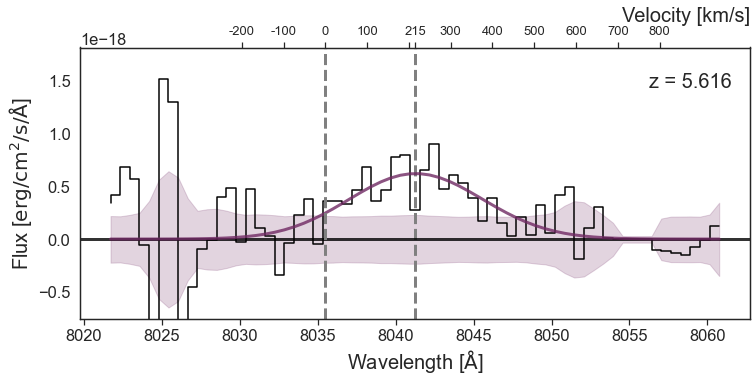

z6_GND_36100
287.72762923298416


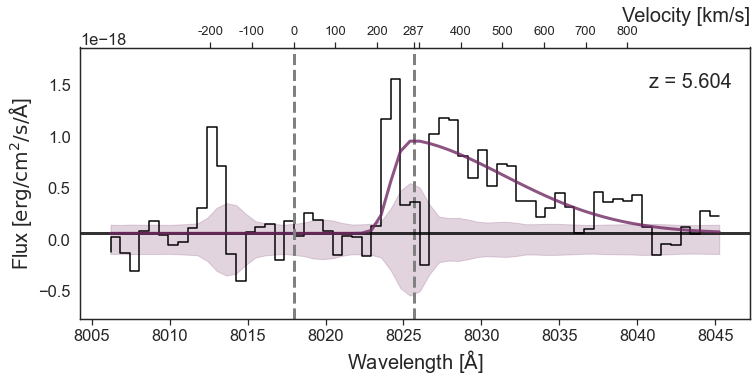

z7_GND_8358
267.02158132552205


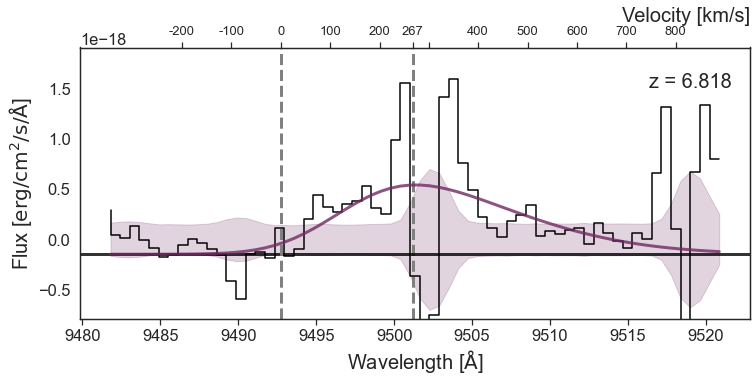

z5_GND_39445
187.0852453699895


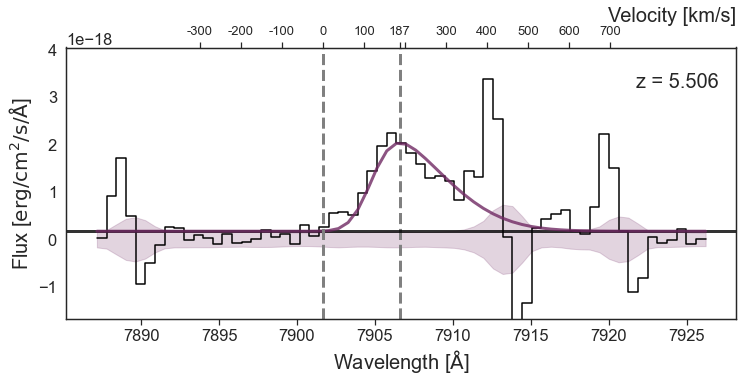

z5_GND_27819
384.09851162787476


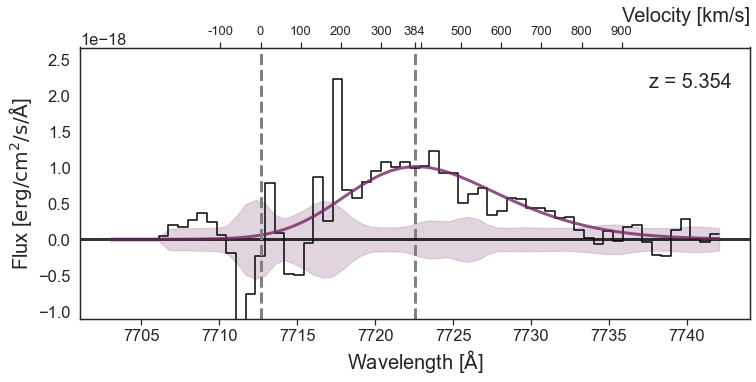

z5_GND_21153
218.39662921315045


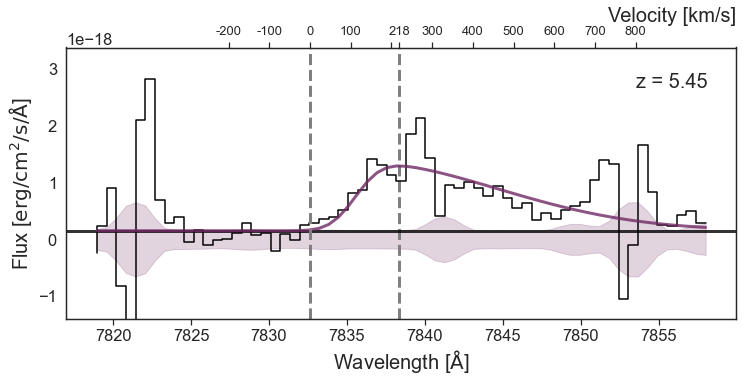

z5_GND_17752
93.36346306948613


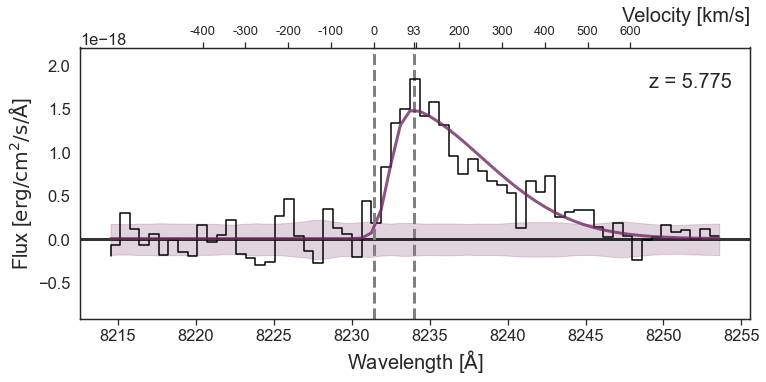

Jung18_z6_GND_28438
244.0451386943562


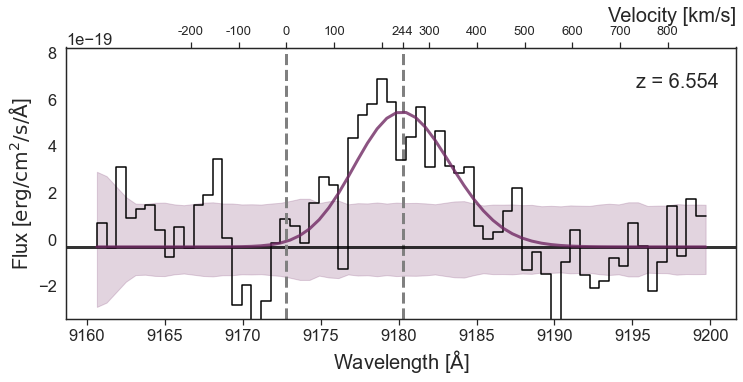

In [30]:
import sys
sys.path.insert(1, '../CalibrationCode/')
from exception import *

sns.set_theme(style="white",font_scale = 1.5)
plt.rcParams["figure.figsize"] = (12,5)

for gal in PObj:
    fig, ax1 = plt.subplots(1, 1)
    ax2 = ax1.twiny()
    ID=gal.ID
    Offset=gal.off[1]   

    lya=1215.335*(1+gal.zLya)
    #conwave,conflux,conerr=MaskSpec(Spectra[ID],gal.zLya,range=20)
    wave0,flux0,err0=MaskSpec(Spectra[ID],gal.zLya,unmasked=True)
    wave,flux,err=MaskSpec(Spectra[ID],gal.zLya,range=20)
    samples=Distributions[ID]

    print(ID)

    exc = [e  for e in giveExceptions() if e['ID']==ID] #Match ID to exception ID
    if exc==[]:
        #print("No exception")
        excStatus=False
        eks=20
        mask=(wave0>lya-eks) & (wave0<lya+eks)

    elif len(exc)!=0:
        exc=exc[0]
        #print("Exception",exc)
        excStatus=True
        
        if exc['Skip']==True:
            continue

        elif exc['CW']!=None:
            clambda=exc["CW"]
        mask = (wave0 >= exc['LW']) & (wave0 <= exc['RW'])  #mask with exception

    conwave,conflux,conerr=wave0[mask],flux0[mask],err0[mask]

    print(Offset)

    Gaussian=skewed_gaussian(wave,*np.median(samples,axis=1))
    Gaussian=Gaussian*max(conflux)



    ax1.axvline(x=lya,color="gray",ls="--",lw=3)
    ax1.axhline(y=np.median(samples[4])*max(conflux),color="black",alpha=0.8,lw=3)
    ax1.step(wave,flux,color="black")
    ax1.plot(wave,Gaussian,color="#702963",alpha=0.8,lw=3)
    ax1.fill_between(wave,-err,err,color='#702963',alpha=0.2,zorder=-10)



   
    ax1.set_ylim(-max(flux)*0.5,max(flux)*1.2)
    ax1.set_xlabel(r"Wavelength [$\mathrm{\AA}$]",fontsize=20)
    ax1.set_ylabel(r"Flux [$\mathrm{erg/cm^2/s/\AA}$]",fontsize=20)
    ax2.set_xlabel("Velocity [km/s]",loc='right',fontsize=20)


    ax2.set_xticks(ax1.get_xticks())
    ax2.set_xbound(ax1.get_xbound())


    #ax2.set_xticklabels([ np.round(angstromTokms(lya,w)+Offset,2) for w in ax1.get_xticks()])

    ax2.set_xticks(fix_XticksVelocities(lya,Offset,'kms')[0])
    ax2.set_xticklabels(fix_XticksVelocities(lya,Offset,'kms')[1])
    ZeroLoc=fix_XticksVelocities(lya,Offset,'kms')[2]
    ax1.axvline(x=ZeroLoc,color="gray",ls="--",lw=3)
    ax2.tick_params(axis='x', labelsize=13)
    ax1.text(  # position text relative to Axes
                0.85, 0.85, 'z = '+str(np.round(gal.zLya,3)),
                transform=ax1.transAxes, size=20)
    #plt.subplots_adjust(wspace=-0.5, hspace=-0.2)
    plt.savefig("../figues/infall/"+gal.ID+"_offset.pdf",bbox_inches="tight")
    plt.savefig("../figues/infall/png/"+gal.ID+"_offset.png",bbox_inches="tight")
    plt.show()